This analysis has been prompted by the recent media trends have been emphasizing the fires in the Amazon Rainforest. The question we want answered is: Are the fires occuring in Brazil abnormal?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

fire_filepath= "../input/forest-fires-in-brazil/amazon.csv"
fire_data= pd.read_csv(fire_filepath,encoding="windows-1252")
fire_data.tail()

Setup Complete


,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [2]:
fire_data.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [3]:
fire_data.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [4]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
fire_data.number.replace(['-'],0.0,inplace = True)
fire_data.number.replace([' '],0.0,inplace = True)
fire_data.head(-10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6439,2002,Tocantins,Dezembro,39.0,2002-01-01
6440,2003,Tocantins,Dezembro,109.0,2003-01-01
6441,2004,Tocantins,Dezembro,96.0,2004-01-01
6442,2005,Tocantins,Dezembro,53.0,2005-01-01


In [6]:
fire_date_data= fire_data.groupby(by = ['year','state', 'month']).sum().reset_index()
fire_date_data.head()

,year,state,month,number
0,1998,Acre,Abril,0.0
1,1998,Acre,Agosto,130.0
2,1998,Acre,Dezembro,7.0
3,1998,Acre,Fevereiro,0.0
4,1998,Acre,Janeiro,0.0


The graph below depicts toal fires in Brazil between 1998 and 2017.

(1998, 2017)

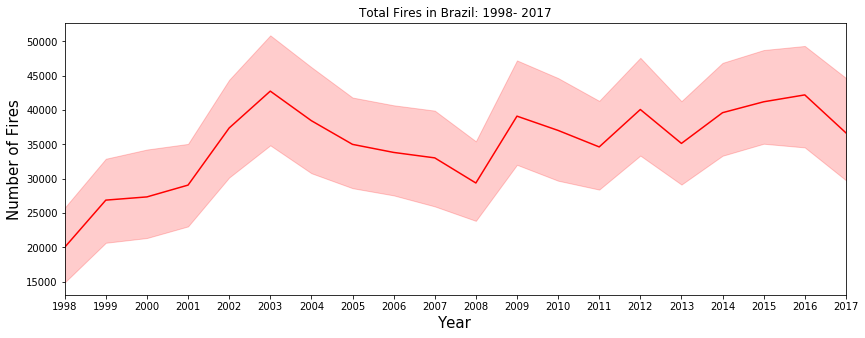

In [7]:
plt.figure(figsize=(14,5))
total_fires=sns.lineplot(x= 'year', y= 'number', data= fire_date_data, estimator= "sum", color= "red")
plt.title('Total Fires in Brazil: 1998- 2017')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Fires', fontsize = 15)
total_fires.xaxis.set_major_locator(plt.MaxNLocator(19))
total_fires.set_xlim(1998, 2017)

After getting a preliminary glipse at our data we still need more detailed information to answer our question.Overall analysis of all fires occuring in the entirety of Brazil show no recent spike in frequency over the years. However, we do see a slight overall increase in fires after 2010 so let's keep digging to get a clearer picture. Therefore let's break the data down by states to get a better idea of the situation.

(1998, 2017)

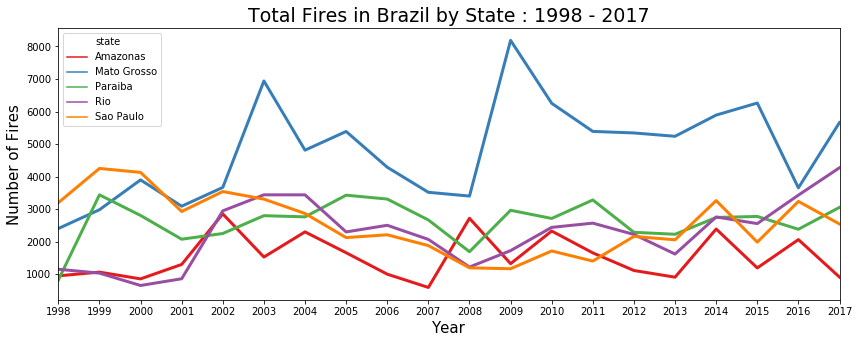

In [8]:
fire_state_data= fire_data[fire_data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()
plt.figure(figsize=(14,5))
flp = sns.lineplot(x='year', y='number', data= fire_state_data, lw = 3, estimator = 'sum', err_style= None, hue= 'state', palette= "Set1")
plt.title('Total Fires in Brazil by State : 1998 - 2017', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Fires', fontsize = 15)
flp.xaxis.set_major_locator(plt.MaxNLocator(19))
flp.set_xlim(1998, 2017)

When we break down the data by states it becomes clear that Mato Grosso not only contains the most fires annually but also had a dramatic spike in 2010. Why is this?

Firstly, it is important to note that Mato Grosso is an agricultural epicenter of Brazil and is Brazil's powerhouse for cattle hearding. According to Peterson Vale of the Center for Sustainability and the Global Environment (SAGE), "the state of [Mato Grosso](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0215286) is Brazil’s agribusiness powerhouse with a cattle herd of 30.2 million head in 2017." Cattle herding, according to the Global Forest Atlas of Yale, "is the largest driver of deforestation in every Amazon country, accounting for [80% of current deforestation rates](https://globalforestatlas.yale.edu/amazon/land-use/cattle-ranching)." This can explain the higher levels of forest fires found in Mato Grosso as compared to the rest of Brazil. Moreover, Mato Grosso also contains the Amazon Rainforest which can be another reason why there are more forest fires found in the region as compared to somewhere else like Sao Paulo. Not only this but Mato Grosso was hit by a [massive drought in 2010](https://www.worldbank.org/en/news/feature/2013/02/15/Brazil-fights-global-warming-Amazon) which laid way to many forest fires.

In [9]:
#amazon fire data by month
amnz_fire_data= fire_data[fire_data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()
mtgr_fire_data= fire_data[fire_data['state'] == 'Mato Grosso'].groupby(by = ['year','state', 'month']).sum().reset_index()
amnz_fire_data.head()
amnz_fire_data.head()



,year,state,month,number
0,1998,Amazonas,Abril,0.0
1,1998,Amazonas,Agosto,321.0
2,1998,Amazonas,Dezembro,196.0
3,1998,Amazonas,Fevereiro,0.0
4,1998,Amazonas,Janeiro,0.0


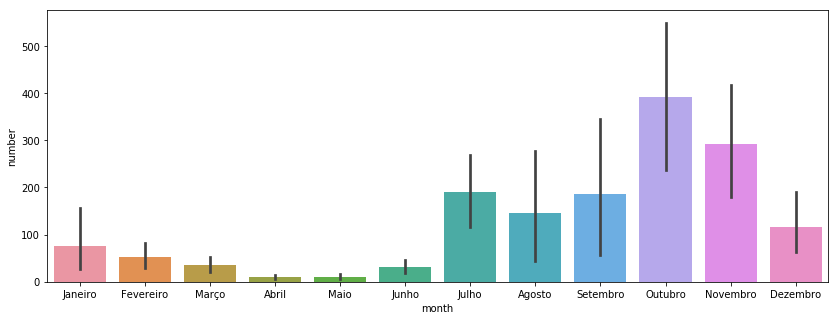

In [10]:
plt.figure(figsize=(14,5))
amnz_months= sns.barplot(x= amnz_fire_data.month, y= amnz_fire_data.number, order= ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

Breaking down the number of fires by month in just the Amazonas state shows a clear uptick in fires from July to December, or more broadly their Winter (June to August) and Spring (September to November) [seasons](http://www.universaltraveller.com.au/destinations/brazil/weather) which tend to be their dry season (Winter) and the begining of their rainy season (Spring).

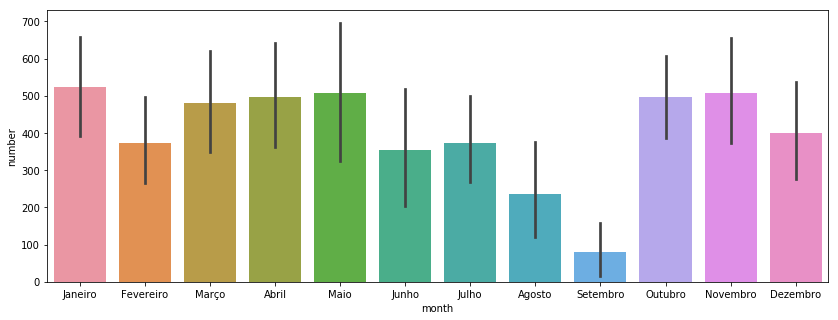

In [11]:
plt.figure(figsize=(14,5))
mtgr_months= sns.barplot(x= mtgr_fire_data.month, y= mtgr_fire_data.number,order= ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

Breaking down the number of fires per month in Mato Grosso shows fire occurances happening throughout the most part of the year.

Let's join the Amazonas and Mato Grosso state data to get an overall view of the entire Amazon rainforest.

In [12]:
amnz_total_data= fire_data[fire_data['state'].isin(['Amazonas','Mato Grosso'])].groupby(by = ['year','state', 'month']).sum().reset_index()
amnz_total_data.info

<bound method DataFrame.info of      year        state      month   number
0    1998     Amazonas      Abril    0.000
1    1998     Amazonas     Agosto  321.000
2    1998     Amazonas   Dezembro  196.000
3    1998     Amazonas  Fevereiro    0.000
4    1998     Amazonas    Janeiro    0.000
..    ...          ...        ...      ...
473  2017  Mato Grosso       Maio  917.000
474  2017  Mato Grosso      Março  889.000
475  2017  Mato Grosso   Novembro  946.000
476  2017  Mato Grosso    Outubro  689.800
477  2017  Mato Grosso   Setembro   26.929

[478 rows x 4 columns]>

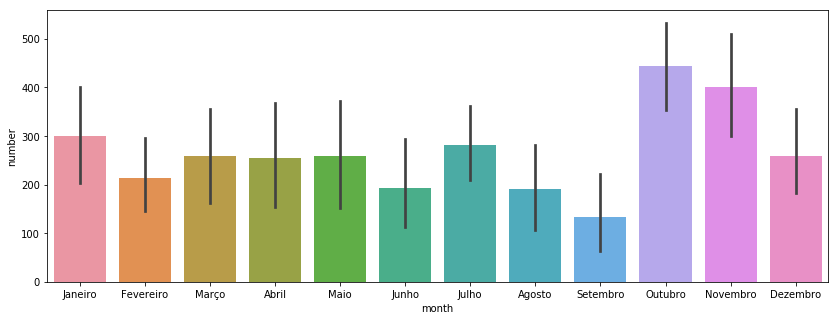

In [13]:
plt.figure(figsize=(14,5))
amnz_total_graph= sns.barplot(x=amnz_total_data.month, y=amnz_total_data.number,order= ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

As we put the data together, we can still see that there is an increase during October and November. This is curious because November should be rainy season. Lets try to clear this up by taking out abnormal years such as 2005, 2006, 2010, and 2015. Brazil [experienced a big drought in 2005 that offset the rainy season in 2006](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2019GL083776) and in [2010 and 2015](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2015GB005133) Brazil again experienced abnormally dry and persistent droughts.
We will therefore look only at a sample of the years 2012-2014.

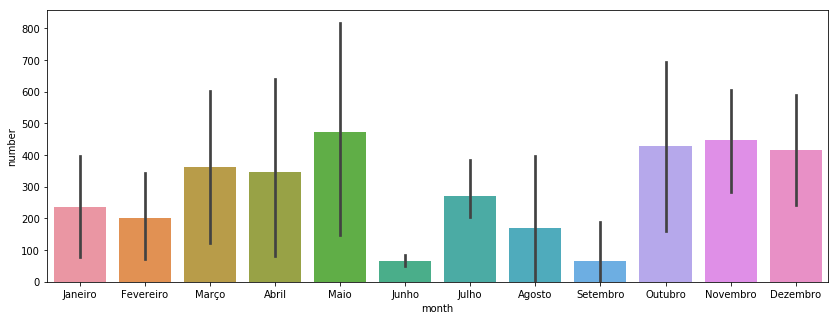

In [14]:
plt.figure(figsize=(14,5))
amnz_nonbig_months_data= fire_data[fire_data['state'].isin(['Amazonas','Mato Grosso'])].groupby(by = ['year','state', 'month']).sum().reset_index()
amnz_nonbig_months_data= amnz_nonbig_months_data[amnz_nonbig_months_data['year'].isin(['2012','2013','2014'])].groupby(by = ['year','state', 'month']).sum().reset_index()
amnz_nonbig_months_data.head()
nonbig_months_graph= sns.barplot(x=amnz_nonbig_months_data.month, y=amnz_nonbig_months_data.number,order= ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

Still particular. Why does the graph indicate that May, October, November, and December as the months with the highest number of fires. November and December are supposed to be the begining of the wet season. Let's dig deeper by looking outside of our dataset for answers

[Mikaela Weisse](https://www.washingtonpost.com/weather/2019/08/21/amazonian-rainforest-is-ablaze-turning-day-into-night-brazils-capital-city/), a program manager with Global Forest Watch, confirms our analysis by stating that fire season in Brazil peaks between August and October.

When analysing this data we must note a few things. Firstly, the data ends at 2017. therefore we cannot extrapolate to 2019 and answer our question if the fires in the Amazon are currently abnormal. Secondly, not we must realize that not all fires are reported. This can lead to a skewness in the data. But overall all what we can take away from our current analysis is that there are fluctuations to the number of fires happening in Brazil and is not showing a sign of a constant upward slope. This does not however mean that we should not be cautious about the fires happening currently in the Amazon. 